In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\users\an\anaconda3\lib\site-packages (19.3.1)


In [2]:
!pip install JPype1-0.7.0-cp37-cp37m-win_amd64.whl 

In [15]:
!pip install pytagcloud
!pip install matplotlib
!pip install wordcloud

In [4]:
!pip install pygame

In [5]:
!pip install konlpy
!pip install Pillow

In [168]:
from PIL import Image
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from itertools import chain
import pickle
import csv

In [6]:
from bs4 import BeautifulSoup as bs
import urllib.request
from urllib.parse import quote
from openpyxl.drawing.image import Image
import json
import re
import requests
import os
import sys
from urllib.request import urlretrieve
import datetime
import time
import openpyxl
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [251]:
client_id = "REfb8rQvmk8dqoJDyF02"
client_secret = "Kta3t6rCAl"

wb = openpyxl.Workbook()
sheet = wb.active
#sheet.append(["영화제목", "영화평점", "영화장르", "영화감독", "영화배우", "영화포스터"])
result=[]
html = urllib.request.urlopen("https://movie.naver.com/movie/running/current.nhn")
soup = bs(html, 'html.parser',from_encoding='utf-8')

# (1) 전체 컨테이너
movie = soup.select("div.lst_wrap li")

# (2) 전체 컨테이너가 갖고 있는 영화관련 정보
for i, m in enumerate(movie):
    # (3-1) 영화제목 수집
    title = m.select_one("dt.tit a")
    
    # (3-2) 영화평점 수집
    score = m.select_one("div.star_t1 span.num")
    
    # (3-3) 영화장르 수집
    genre = m.select("dl.info_txt1 dd:nth-of-type(1) a")
    
    # (3-4) 영화감독 수집
    directors = m.select("dl.info_txt1 dd:nth-of-type(2) a")
    
    # (3-5) 영화배우 수집
    actors = m.select("dl.info_txt1 dd:nth-of-type(3) a")
    
    print("="*50)
    print("제목:", title.text)
   
    print("="*50)
    print("평점:", score.text)
    
    print("="*50)
    print("장르:")
    for g in genre:
        print(g.text)
    
    print("="*50)
    print("감독:")
    for d in directors:
        print(d.text)

    print("="*50)
    print("배우:")    
    for a in actors:
        print(a.text)
    
    
        
    # (7) 영화관련정보 엑셀(xlsx) 형식 저장
    # (7-1) 데이터 만들기-1 : HTML로 가져온 영화장르/영화감독/영화배우 정보에서 TEXT정보만 뽑아서 리스트 형태로 만들기
    genre_list = [g.text for g in genre]
    directors_list = [d.text for d in directors]
    actors_list = [a.text for a in actors]
    
     # (7-2) 데이터 만들기-2 : 여러 개로 이루어진 리스트 형태를 하나의 문자열 형태로 만들기
    genre_str = ','.join(genre_list)
    directors_str = ','.join(directors_list)
    actors_str = ','.join(actors_list)
    
    # (7-3) 영화관련정보 엑셀 행 추가 : line by line 으로 추가하기
    sheet.append([title.text, score.text, genre_str, directors_str, actors_str])
    
    # (8) 영화포스터 수집
    img_src = m.select_one("div.thumb a img")
    print(img_src)
    
    # (8-1) 영화제목 공백 제거, : 변경
    title_rename = title.text.replace(" ", "").replace(":", "_")
    
    # (8-2) 영화포스터 이미지파일 저장
   
    urllib.request.urlretrieve(img_src.attrs["src"], ("naver_img/" + title_rename + ".png"))
    
    # (8-3) 영화포스터 이미지파일을 엑셀로 불러들이기
    img = openpyxl.drawing.image.Image("naver_img/" + title_rename + ".png")
    #img.drawing.width = 40
    #img.drawing.height = 40
    
    # (8-4) 영화포스터 엑셀 행 추가 : 영화관련정보 옆(=F열)에 추가하기
    sheet.add_image(img, 'F' + str(i+2))
    
    print("="*50)
    print(title_rename, "포스터 저장 완료!")
   
   
#(9) 엑셀 저장
wb.save("navermovie.csv")

load_ws =sheet
all_values = []

for row in load_ws.rows:
    row_value = []
    for cell in row:
        row_value.append(cell.value)
    all_values.append(row_value)
print(all_values)
all_values_table=pd.DataFrame(all_values,columns=("영화제목", "영화평점", "영화장르", "영화감독", "영화배우"))
all_values_table.to_csv("navermovie_1.csv",encoding="cp949",mode='w',index=True)

제목: 겨울왕국 2
평점: 8.68
장르:
애니메이션
모험
코미디
가족
판타지
뮤지컬
감독:
크리스 벅
제니퍼 리
배우:
크리스틴 벨
이디나 멘젤
<img alt="겨울왕국 2" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191121_221/1574298335357mqgLk_JPEG/movie_image.jpg?type=m99_141_2"/>
겨울왕국2 포스터 저장 완료!
제목: 쥬만지: 넥스트 레벨
평점: 6.08
장르:
액션
모험
감독:
제이크 캐스단
배우:
드웨인 존슨
잭 블랙
케빈 하트
카렌 길런
<img alt="쥬만지: 넥스트 레벨" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191120_230/15742165480563skun_JPEG/movie_image.jpg?type=m99_141_2"/>
쥬만지_넥스트레벨 포스터 저장 완료!
제목: 포드 V 페라리
평점: 9.56
장르:
액션
드라마
감독:
제임스 맨골드
배우:
맷 데이먼
크리스찬 베일
<img alt="포드 V 페라리" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191204_91/15754257752042kHvB_JPEG/movie_image.jpg?type=m99_141_2"/>
포드V페라리 포스터 저장 완료!
제목: 나이브스 아웃
평점: 9.13
장르:
미스터리
스릴러
감독:
라이언 존슨
배우:
다니엘 크레이그
크리스 에반스
아나 디 아르마스
제이미 리 커티스
토니

82년생김지영 포스터 저장 완료!
제목: 프란치스코 교황: 맨 오브 히스 워드
평점: 8.55
장르:
다큐멘터리
감독:
빔 벤더스
배우:
프란치스코
<img alt="프란치스코 교황: 맨 오브 히스 워드" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191028_187/1572247501973EHegB_JPEG/movie_image.jpg?type=m99_141_2"/>
프란치스코교황_맨오브히스워드 포스터 저장 완료!
제목: 블랙 스완
평점: 8.69
장르:
드라마
스릴러
감독:
대런 아로노프스키
배우:
나탈리 포트만
뱅상 카셀
밀라 쿠니스
<img alt="블랙 스완" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191113_292/1573629127777q6dY0_JPEG/movie_image.jpg?type=m99_141_2"/>
블랙스완 포스터 저장 완료!
제목: 날씨의 아이
평점: 7.88
장르:
애니메이션
감독:
신카이 마코토
배우:
다이고 코타로
모리 나나
오구리 슌
<img alt="날씨의 아이" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20190916_49/1568614827948hyiXA_JPEG/movie_image.jpg?type=m99_141_2"/>
날씨의아이 포스터 저장 완료!
제목: 매리
평점: 6.89
장르:
공포
스릴러
감독:
마이클 고이
배우:
게리 올드만
에밀리 모티머
<img alt="매리" onerror=

극장판타오르지마버스터-블랙어썰트의귀환 포스터 저장 완료!
제목: 영화로운 나날
평점: 9.32
장르:
멜로/로맨스
판타지
드라마
감독:
이상덕
배우:
조현철
김아현
<img alt="영화로운 나날" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191204_178/1575441662995EW3ki_JPEG/movie_image.jpg?type=m99_141_2"/>
영화로운나날 포스터 저장 완료!
제목: 집 이야기
평점: 9.31
장르:
드라마
감독:
박제범
배우:
이유영
강신일
<img alt="집 이야기" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191108_26/1573191459373Y8Qgx_JPEG/movie_image.jpg?type=m99_141_2"/>
집이야기 포스터 저장 완료!
제목: 산타 앤 컴퍼니
평점: 9.00
장르:
코미디
가족
감독:
알랭 샤바
배우:
알랭 샤바
골쉬프테 파라하니
피오 마르마이
<img alt="산타 앤 컴퍼니" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191122_193/1574384150413kwA5h_JPEG/movie_image.jpg?type=m99_141_2"/>
산타앤컴퍼니 포스터 저장 완료!
제목: 크롤
평점: 6.94
장르:
액션
스릴러
감독:
알렉산드르 아야
배우:
카야 스코델라리오
배리 페퍼
<img alt="크롤" onerror="this.src='https://ssl.ps

삼촌 포스터 저장 완료!
제목: 메기
평점: 8.30
장르:
드라마
미스터리
코미디
감독:
이옥섭
배우:
이주영
문소리
구교환
천우희
<img alt="메기" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20190903_89/1567472276429VUl4Y_JPEG/movie_image.jpg?type=m99_141_2"/>
메기 포스터 저장 완료!
제목: 코끼리는 그곳에 있어
평점: 9.09
장르:
드라마
감독:
후 보
배우:
펑유창
왕위원
장 위
리총시
<img alt="코끼리는 그곳에 있어" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191028_281/1572230320631iBVXm_JPEG/movie_image.jpg?type=m99_141_2"/>
코끼리는그곳에있어 포스터 저장 완료!
제목: 어제 일은 모두 괜찮아
평점: 9.22
장르:
드라마
감독:
이성한
배우:
김재철
윤찬영
손상연
김민주
김진영
<img alt="어제 일은 모두 괜찮아" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191028_133/1572229718476J8ikm_JPEG/movie_image.jpg?type=m99_141_2"/>
어제일은모두괜찮아 포스터 저장 완료!
제목: 라스트 씬
평점: 7.75
장르:
다큐멘터리
감독:
박배일
배우:
<img alt="라스트 씬" onerror="this.src='https://ssl.pstatic.net/stati

북간도의십자가 포스터 저장 완료!
제목: 기생충
평점: 8.47
장르:
드라마
감독:
봉준호
배우:
송강호
이선균
조여정
최우식
박소담
이정은
장혜진
<img alt="기생충" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20190528_36/1559024198386YVTEw_JPEG/movie_image.jpg?type=m99_141_2"/>
기생충 포스터 저장 완료!
제목: 행동하는 양심 김대중
평점: 3.12
장르:
다큐멘터리
감독:
신상민
배우:
이금희
<img alt="행동하는 양심 김대중" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191106_263/15730159078208Pj1g_JPEG/movie_image.jpg?type=m99_141_2"/>
행동하는양심김대중 포스터 저장 완료!
제목: 무뢰한
평점: 7.83
장르:
멜로/로맨스
드라마
감독:
오승욱
배우:
전도연
김남길
박성웅
<img alt="무뢰한" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20150508_242/1431069888008i7klX_JPEG/movie_image.jpg?type=m99_141_2"/>
무뢰한 포스터 저장 완료!
제목: 해피 엔드
평점: 8.27
장르:
스릴러
감독:
정지우
배우:
최민식
전도연
주진모
<img alt="해피 엔드" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/0

부에나비스타소셜클럽 포스터 저장 완료!
제목: 서칭 포 슈가맨
평점: 9.00
장르:
다큐멘터리
감독:
말릭 벤젤룰
배우:
말릭 벤젤룰
로드리게즈
<img alt="서칭 포 슈가맨" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20120904_110/1346727878559zYfDL_JPEG/movie_image.jpg?type=m99_141_2"/>
서칭포슈가맨 포스터 저장 완료!
제목: 얼굴없는 보스
평점: 3.37
장르:
느와르
드라마
감독:
송창용
배우:
천정명
진이한
이하율
곽희성
이시아
김도훈
이지훈
<img alt="얼굴없는 보스" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191015_278/1571104268988MlSH6_JPEG/movie_image.jpg?type=m99_141_2"/>
얼굴없는보스 포스터 저장 완료!
제목: 엔젤 해즈 폴른
평점: 8.46
장르:
액션
스릴러
감독:
릭 로먼 워
배우:
제라드 버틀러
모건 프리먼
<img alt="엔젤 해즈 폴른" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191113_233/1573623877830zX5e9_JPEG/movie_image.jpg?type=m99_141_2"/>
엔젤해즈폴른 포스터 저장 완료!
제목: 겁쟁이 페달: 더 무비
평점: 8.97
장르:
애니메이션
감독:
나가누마 노리히로
배우:
야마시타 다이키
토리우미 코스케
후쿠시마 준
야스모토 히로키
모리쿠보 

설리반의여행 포스터 저장 완료!
제목: 슈퍼소닉
평점: 9.24
장르:
다큐멘터리
감독:
맷 화이트크로스
배우:
노엘 갤러거
리암 갤러거
<img alt="슈퍼소닉" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20161024_90/1477270787960CSQaf_JPEG/movie_image.jpg?type=m99_141_2"/>
슈퍼소닉 포스터 저장 완료!
제목: 심판
평점: 8.97
장르:
드라마
범죄
감독:
파티 아킨
배우:
다이앤 크루거
<img alt="심판" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20191018_96/1571362852550MC1HP_JPEG/movie_image.jpg?type=m99_141_2"/>
심판 포스터 저장 완료!
제목: 아비정전
평점: 8.48
장르:
드라마
범죄
멜로/로맨스
감독:
왕가위
배우:
장국영
장만옥
유덕화
<img alt="아비정전" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141.png'" src="https://movie-phinf.pstatic.net/20170315_53/148955223217831bi6_JPEG/movie_image.jpg?type=m99_141_2"/>
아비정전 포스터 저장 완료!
제목: 어떤 하루
평점: 7.77
장르:
드라마
감독:
정가영
전선호
최진혁
배우:
최수인
김영서
<img alt="어떤 하루" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/09/dft_img99x141

밀양 포스터 저장 완료!
[['겨울왕국 2', '8.68', '애니메이션,모험,코미디,가족,판타지,뮤지컬', '크리스 벅,제니퍼 리', '크리스틴 벨,이디나 멘젤'], ['쥬만지: 넥스트 레벨', '6.08', '액션,모험', '제이크 캐스단', '드웨인 존슨,잭 블랙,케빈 하트,카렌 길런'], ['포드 V 페라리', '9.56', '액션,드라마', '제임스 맨골드', '맷 데이먼,크리스찬 베일'], ['나이브스 아웃', '9.13', '미스터리,스릴러', '라이언 존슨', '다니엘 크레이그,크리스 에반스,아나 디 아르마스,제이미 리 커티스,토니 콜렛,마이클 섀넌,돈 존슨,키스 스탠필드,캐서린 랭포드,제이든 마텔,크리스토퍼 플러머'], ['감쪽같은 그녀', '7.53', '드라마', '허인무', '나문희,김수안'], ['아내를 죽였다', '5.67', '스릴러,액션', '김하라', '이시언,안내상,왕지혜'], ['라스트 크리스마스', '6.75', '멜로/로맨스,코미디', '폴 페이그', '에밀리아 클라크,헨리 골딩'], ['카운트다운', '6.85', '공포,스릴러', '저스틴 덱', '엘리자베스 라일,피터 파시넬리,탈리타 베이트먼,조던 캘러웨이'], ['블랙머니', '8.52', '범죄,드라마', '정지영', '조진웅,이하늬'], ['윤희에게', '9.18', '멜로/로맨스', '임대형', '김희애,김소혜,성유빈,나카무라 유코,키노 하나'], ['두 교황', '8.95', '드라마', '페르난도 메이렐레스', '안소니 홉킨스,조나단 프라이스'], ['나를 찾아줘', '7.09', '스릴러', '김승우', '이영애,유재명,박해준,이원근'], ['파비안느에 관한 진실', '8.36', '드라마', '고레에다 히로카즈', '까뜨린느 드뇌브,줄리엣 비노쉬,에단 호크'], ['아스테릭스: 마법 물약의 비밀', '8.62', '애니메이션,코미디,가족,판타지', '알렉상드르 아스티에,루이 클리시', '크리스티앙 클라비에,기욤 브리에'], ['결혼 이야기', '9.11'

In [16]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import font_manager
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [92]:
data1 = pd.read_csv('navermovie_1.csv', encoding='cp949',index_col=0, header=0, engine='python')

In [96]:
data1.head()
data1.shape

(110, 5)

In [68]:
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

In [69]:
def getInfoFromNaver(searchTitle):
    items = searchByTitle(searchTitle)
 
    if (items != None):
        findItemByInput(items)
    else:
        print("No result")
        
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" %node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   
    
    if (responseDecode == None):
        
        return None
    else:
        return json.loads(responseDecode)

In [82]:
def findItemByInput(post, jsonResult,cnt):
        navertitle = post['title']
        naversubtitle = post['subtitle']
        naverpubdate = post['pubDate']
        naveractor = post['actor']
        naverlink = post['link']
        naveruserScore = post['userRating']
 
        navertitle1 = navertitle.replace(" ","")
        navertitle1 = navertitle1.replace("-", ",")
        navertitle1 = navertitle1.replace(":", ",")
 
        #기자 평론가 평점을 얻어 옵니다
        spScore = getSpecialScore(naverlink)
 
        #네이버가 다루는 영화 고유 ID를 얻어 옵니다
        naverid = re.split("code=", naverlink)[1]
 
        # 영화의 타이틀 이미지를 표시합니다
        #if (post['image'] != None and "http" in post['image']):
         #   response = requests.get(post['image'])
          #  img = Image.open(BytesIO(response.content))
           # img.show()
 
        print( navertitle, naversubtitle, naveruserScore, spScore)
        jsonResult.append({'cnt':cnt, 'title':navertitle,'subtitle': naversubtitle, 'pubDate':naverpubdate,   'actor': naveractor,   'link':naverlink, 'userRating':naveruserScore })

In [76]:
#기자 평론가 평점을 얻어 옵니다
def getSpecialScore(URL):
    soup = get_soup(URL)
    scorearea = soup.find_all('div', "spc_score_area")
    newsoup = bs(str(scorearea), 'lxml')
    score = newsoup.find_all('em')
    if (score and len(score) > 5):
        scoreis = score[1].text + score[2].text + score[3].text + score[4].text
        return float(scoreis)
    else:
        return 0.0

In [74]:

def get_soup(url):
    source_code = requests.get(url)
    plain_text = source_code.text
    soup = bs(plain_text, 'lxml')
    return soup


In [146]:

    node = 'movie'
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    if(jsonResponse!=None):    
        for post in jsonResponse['items']:
            cnt += 1
            findItemByInput(post, jsonResult, cnt) 
    else:
        print("no result")
        
       # start = jsonResponse['start'] + jsonResponse['display']
       # jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('./%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
    

검색어를 입력하세요: 겨울왕국2
[2019-12-17 22:28:35.049592] Url Request Success
<b>겨울왕국 2</b> Frozen <b>2</b> 8.68 6.75
전체 검색 : 1 건
가져온 데이터 : 1 건
겨울왕국2_naver_movie.json SAVED


In [157]:
def get_data(url,data):
    # openpyxl을 이용해 엑셀 파일로 저장하기 위한 준비 과정
   # excell = Workbook(write_only=True)
    #ws = excell.create_sheet()
    #ws.append(['score', 'title', 'writer', 'date', 'review', 'senti_score'])

    resp = requests.get(url)
    html =bs(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis=  score_result.findAll('li')
    for li in lis:        
        movietitle = li.find('a').getText()
        review_text = li.find('p').getText()
        score = li.find('em').getText()
        
        watch_movie = li.find('span', {'class':'ico_viewer'})
        
        # 간단하게 프린트만 했습니다.
        print(movietitle, review_text, score, watch_movie and True or False)
        data.append(review_text)
        

In [156]:
#크롤링 시작#
url_base = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=" #네이버 영화 상세 리뷰 1
url_paging ="&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=" #네이버 영화 상세 리뷰 2
 
with  open('./%s_naver_%s.json' % (srcText, node), 'r', encoding='utf8') as json_file:
    json_data = json.load(json_file)

naverid=[]

print(json_data[0]['link'])
data=[]
count =0
for post in json_data:
    print(post)
    print(post['link'])
    json_link=post['link']
    naverid.append( re.split("code=",json_link )[1])
    resp = requests.get(json_link+'&type=after')
    html = bs(resp.content, 'html.parser')
    #result = html.find('div', {'class':'score_total'}).find('strong').findChildren('em')[1].getText()
    #total_count = int(result.replace(',', ''))
    
    for i in range(1, 100):
        urlpage=url_base+naverid[count]+url_paging+str(i)
        print('url: "' + urlpage + '" is parsing....')
        get_data(urlpage,data)
        
    count+=1
    
print(naverid)


https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873
{'actor': '크리스틴 벨|이디나 멘젤|', 'cnt': 1, 'link': 'https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873', 'pubDate': '2019', 'subtitle': 'Frozen <b>2</b>', 'title': '<b>겨울왕국 2</b>', 'userRating': '8.68'}
https://movie.naver.com/movie/bi/mi/basic.nhn?code=136873
url: "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=136873&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1" is parsing....

병지(dlqu****)
 


														
															
															
																올라프의 1편요약이 기가맥힙니다 
															
														
														
													
 10 False

이지영(dlwl****)
 


														
															
															
																크리스토퍼 뮤비에서 좀 흠칫함 
															
														
														
													
 10 False

배병준(qudw****)
 
관람객


														
															
															
																미래가 보이지 않을 때는 지금 해야할 일을 해야 해 
											


																		웃음포인트도 적절히 있고 스토리도 좋고 영상미는 정말 공을 많이 들인듯 합니다 .조만간 엘사옷 엄청 팔릴듯 하네용 ㅋㅋㅋ나오면서 사람들 워어어어~ 워어어어~ 이러면서 나오는데 제가 엘사된거 같네요 ㅋㅋㅋ쿠키는 1개입...
																	 




																		웃음포인트도 적절히 있고 스토리도 좋고 영상미는 정말 공을 많이 들인듯 합니다 .조만간 엘사옷 엄청 팔릴듯 하네용 ㅋㅋㅋ나오면서 사람들 워어어어~ 워어어어~ 이러면서 나오는데 제가 엘사된거 같네요 ㅋㅋㅋ쿠키는 1개입...
																	


 10 False

CHEE(hang****)
 
관람객


														
															
															
																아침부터 반차내고 보고 온 보람이 있다ㅠㅠ 비주얼은 얼음인데 마음은 이렇게 따뜻할 수가..♥ 사랑해 겨울왕국ㅠㅠ 사랑해 디즈니! 
															
														
														
													
 10 True

jske****
 
관람객


														
															
															
																전편보다는 못한거  같아요... 
															
														
														
													
 6 True

밤비몬(bamb****)
 


														
															
															
																노래들은 좋은데스토리라인이 정말 많이 부실해요서로 안고 울고 그거밖에 없음 
															
														
														
													
 2 False

ghd143(852u****)
 


														
															
															
		

 


														
															
															
																두번 세번 봐도 돈이 아깝지 않을거 같음~~ 역시 최고다 겨울왕국ㅎㅎㅎ 
															
														
														
													
 9 False

네 그렇습니다(iamm****)
 
관람객


														
															
															
																노래 3곡만 덜했어도 더 재밌게 봤을 듯.하아 또 노래 불러? 
															
														
														
													
 6 True

준우(joun****)
 


														
															
															
																기대를 저버리지않는 디즈니 겨울왕국1보다 더 섬세한 연출과 스토리,,2번봐도 좋을 영화 
															
														
														
													
 10 False

Mayjoy(kunt****)
 
관람객


														
															
															
																기대를 낮추고 봤지만 그래도 실망스러웠음 스토리 OST 캐릭터 중 엘사만 평타 
															
														
														
													
 1 True

애니웨어(skyw****)
 


														
															
															
																글쌔 ..?  1편 만한 2편은 없다는게 이런거구나 느낌 
															
														
														
													
 6 False

제시카(onec****)
 


														
							

 


														
															
															
																지나치게 많은 음악은 우리 몸에 해롭습니다. 
															
														
														
													
 2 False

죠비(dudw****)
 
관람객


														
															
															
																다들 모험하고 있는데 크리스토프 혼자 발라드 뮤비 찍고 있음. 
															
														
														
													
 6 True

sksk(sk45****)
 


														
															
															
																엘사가 예쁨. 스토리는 잘 모르겠어요 중간에 ㅇ살짝 졸았네요 
															
														
														
													
 4 False

omnicide(supe****)
 


														
															
															
																1편 보고 기대했다간 큰코다칠것.. 많고도 많은 노래중 마지막 엔딩곡빼곤 기억에 남는곡도 없음 
															
														
														
													
 3 False

뚱이 맘(twin****)
 
관람객


														
															
															
																1편을 재밌게 본 사람으로서 2편은 너무 기대가 높았었나뵈요.. 7살난 쌍둥이 딸내미 둘다 지루해하고 OST도 인상깊지 않네요.. 
															
														
														
													
 6 True
url: "https://movie.nav


후니(fhzj****)
 


														
															
															
																여번 엘사 드레스 역대급 인정? 
															
														
														
													
 10 False

																		1편 삽입곡들 다 좋았는데 렛잇고 만한 노래 들을수없음...왠지 2편은 성인타켓 애니메이션 같았음. 어른들의 노래 같아 그런지 기억에 남는 노래 하나도 없음... 가사만 다를뿐 다 똑같은 노래같다.그래도 중간에 울라...
																	 
관람객




																		1편 삽입곡들 다 좋았는데 렛잇고 만한 노래 들을수없음...왠지 2편은 성인타켓 애니메이션 같았음. 어른들의 노래 같아 그런지 기억에 남는 노래 하나도 없음... 가사만 다를뿐 다 똑같은 노래같다.그래도 중간에 울라...
																	


 1 True

Bruce(hong****)
 


														
															
															
																영상미는 뛰어남 워터홀스 타고 뛰는장면 멋집니다 눈물을 흘렸어요다만, 중간에 너무 졸렸어요 스토리가 지루해요그리고 애들 뒤에서 과자쩝쩝거리고 시끄러웠어요 
															
														
														
													
 2 False
감상평 보기 
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																1편 보다 훨씬 화려해진 그래픽. 물의 정령을 길들이는 엘사의 모습이 너무 멋졌다. 
															
														
														
													
 10 True

																		1편과 비교하기엔 어려

 10 False

강준혁(tkfc****)
 


														
															
															
																차린건 많은데 정작 먹을게 없는 후속작 
															
														
														
													
 6 False

탈호퀴는 지능순(jiog****)
 


														
															
															
																이게 재밌냐? 진짜 언제끝나나 기다렸다.노래 많이나오는건 둘째치고 그냥 재미가 없자너...너무 루즈함 과거회상장면이 많은데 노잼 대사 영어대사 자체가 수준이 낮음 유치함 
															
														
														
													
 1 False

메리제인(irah****)
 
관람객


														
															
															
																이 정도면 엘사는 어벤져스에 합류해야 하는 거 아니냐 
															
														
														
													
 10 True

ㅎ(iamt****)
 


														
															
															
																여친이랑 봤는데 여친에게 미안힌지만 시원하게 졸았슴다 
															
														
														
													
 6 False
감상평 보기 

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																4대강 디스 영화...ㅋㅋㅋ 대한민국의 사회문제를 디즈니에서??? 
															
														
														
													
 


																		Ost는 전작보다 중독성이 약하고 대신 여러개가 들어가 뮤지컬 느낌도 났음. 스토리가 개연성 없다고 하시는분들은 이해를 잘 못하신듯. 전작과의 개연성이 뛰어나고 스토리는 전편보다 뛰어남. 전편은 디즈니스럽고 아이들을...
																	 




																		Ost는 전작보다 중독성이 약하고 대신 여러개가 들어가 뮤지컬 느낌도 났음. 스토리가 개연성 없다고 하시는분들은 이해를 잘 못하신듯. 전작과의 개연성이 뛰어나고 스토리는 전편보다 뛰어남. 전편은 디즈니스럽고 아이들을...
																	


 10 False

주해진(skg0****)
 
관람객


														
															
															
																각 캐릭터의 시점에서 전개되는 내용의 연관성이 없어서 좀 분산되는 느낌? 애들때문에 상영관이 개판이었던 것도 한 몫 했고..돈주고 스트레스만 얻는 것 같긴한데 엘사가 너무 멋있고 예쁘고 다 해서 볼만함 
															
														
														
													
 8 True

코지(ioup****)
 
관람객


														
															
															
																ost도 그렇고 내용도 전편이 더 재밌던것같음..엘사는 겁나 이쁘게 나오긴했는데... 
															
														
														
													
 8 True

wns3****
 


														
															
															
																이번에는 ost보다 영상미 스토리가 좋은것 같음..여러분 늦은 밤 시간대 보세요.. 아침 오후 일찍가면 어린이 초딩 시험 일찍 끝난 중고딩 학생까지 정신없습니다.. 
															
						


을수(ckvi****)
 
관람객


														
															
															
																겨울왕국2를 보게되면 우리는 다른 디즈니 명작을 찾아 혈안이 되고 엄마들은 엘사 드레스를 구하기 위해 혈안이 된다 
															
														
														
													
 10 True

셀러(ru_s****)
 


														
															
															
																1편 기대하면 완전 실망. 귀에 남는 노래 하나 없고, 이야기도 산으로 간다. 아, 1편만한 속편 없다더니.. 완전.. 하아.. 3D효과도 없음 
															
														
														
													
 6 False
감상평 보기 
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																엘사가 자신을 찾는 건 좋았지만 뜬금없구 힘이 부진한 스토리.. 하지만 넘나 예뿐 엘사온니ㅠㅠ 크리스토프 옛감성솔로가 젤 조흠 
															
														
														
													
 7 True

두부(peac****)
 


														
															
															
																진짜 네이버는 다좋은데 알바가 문제임...알바만없으면 진짜 좋은데 
															
														
														
													
 10 False
감상평 보기 

스포일러가 포함된 감상평입니다. 감상평 보기



																		겨울왕국은 스토리면에서는 치밀하지는 못한 것 같다는 생각이 듭니다. 1편에서도 그렇고 스토리 전개가 개연성이 없는


배재준(kenz****)
 


														
															
															
																1편보단 확실히 별로임... 
															
														
														
													
 8 False

ㄹㄹ(gjrn****)
 
관람객


														
															
															
																엘사 3단변신, 올라프의 개념정리 
															
														
														
													
 9 True

김수아(atom****)
 


														
															
															
																이번편 올라프가 한 건 했다 
															
														
														
													
 9 False

김상준(saon****)
 


														
															
															
																솔직히 ost 처음들을땐 시즌1보단 별루네 했는데 계속들으니까 좋고 입에서 맵돌아요 아아~ 아아~ 
															
														
														
													
 10 False

msr(lg10****)
 


														
															
															
																4DX로 보다가 안구건조증을 얻었습니다 
															
														
														
													
 8 False

순돌이(rnjs****)
 


														
															
															
																솔직히! 1편만큼은 아니지만 그래도 괜찮습니다. 

 
관람객


														
															
															
																엘사랑 안나랑 너무 이뿜 
															
														
														
													
 8 True

김경민(joog****)
 


														
															
															
																겨울왕국2 진짜 대박 잘만들어다 겨울왕국3  도 나와라 
															
														
														
													
 10 False

Gloria(nayo****)
 
관람객


														
															
															
																스케일은 큰데 뭔가 비는 느낌. 그럼에도한번 더 보고픈 영화 
															
														
														
													
 8 True

영민(wlsd****)
 


														
															
															
																7년만에 다시나온 이유가 있었네.7년을 작화,연출,그래픽,ost,캐릭터 디자인 모든 혼을 갈아 만들었네 1~2년 안에 이렇게 못만들어요 
															
														
														
													
 10 False

김태윤(qkqw****)
 


														
															
															
																역시 믿고 보는 디즈니 애니메이션 지금 당장이라도 소장하고 싶은 영화노래는 항상 소름끼칠 정도로 너무 좋음 참고로 안나랑 엘사 너무 이뻐요 
															
														
														
													
 10 False

oops****
 


행복하자(456q****)
 


														
															
															
																1편을 넘는 2편은 없을 줄 알았는데 진짜 1편보다 재밌음 너무 감동적이고 연출과 영상미가 미쳤다 물론 렛잇고는 못넘지만 그걸 제외하고도 훨씬 재밌고 감동이 있다 애니메이션이 아니라 예술이자 작품 
															
														
														
													
 10 False

뚱다롱(ddor****)
 


														
															
															
																올라프에게 위로 받았다. 
															
														
														
													
 9 False

새우(shri****)
 


														
															
															
																영상미 100점 뮤직비디오 10점 스토리 1점 
															
														
														
													
 2 False

니생각에(juny****)
 


														
															
															
																Do you wanna billd a snow man?쿠키영상을 보기위해서는 엔딩을 10분이상 기다려야 한다는 점!참고하세요~ 
															
														
														
													
 10 False

유광사(yoo9****)
 


														
															
															
																아쉽다....잘 만들었는데 재미는 없다 ㅜ ㅜ 
															
														
														
													


000000(sune****)
 


														
															
															
																방귀대장뿡뿡이가 더 재밌다 예측가능스토리 대충만든ost기억에 남는건 아아아아 멜로디랑 올라프 뿐노잼 
															
														
														
													
 2 False

																		디즈니... 너무좋아... 엘사 미쳤음...1편보다 어두운 분위기지만, 소소한 웃음 포인트는 더 많은 것 같음겨울왕국1이 시작한 것을 겨울왕국2에서 깔끔하게 매듭짓는 느낌이었음 1편보다 스토리는 더 내용이 많고 탄탄...
																	 




																		디즈니... 너무좋아... 엘사 미쳤음...1편보다 어두운 분위기지만, 소소한 웃음 포인트는 더 많은 것 같음겨울왕국1이 시작한 것을 겨울왕국2에서 깔끔하게 매듭짓는 느낌이었음 1편보다 스토리는 더 내용이 많고 탄탄...
																	


 10 False

																		너무기대를했나바....1탄보다 별로고 기억에남는노래도 한곡도없네요.. 그냥 겨울왕국1 쿠키영상 긴거보고온느낌~ 보는내내 6살조카 어떤드레스로 사줘야하나 드레스만 골랐어요;; 아무래도 변신할때 말타고다니던 그흰색사줘야...
																	 




																		너무기대를했나바....1탄보다 별로고 기억에남는노래도 한곡도없네요.. 그냥 겨울왕국1 쿠키영상 긴거보고온느낌~ 보는내내 6살조카 어떤드레스로 사줘야하나 드레스만 골랐어요;; 아무래도 변신할때 말타고다니던 그흰색사줘야...
																	


 7 False

wndu****
 


														
															
															
																기대를 안할수가 없는 영화라 기대치를 높게 하고 보러갔지만 5년이라

감상평 보기 
관람객

스포일러가 포함된 감상평입니다. 감상평 보기



																		어릴때부터 공주는 왕자를 만나서 오래오래 행복하게 사는게 행복의 결말이라고 생각했는데 어른이 된 지금여자가 왕이 되고 영웅도 될 수 있는 스토리를 만나서 무척 새롭고 기쁩니다. 저는 어른이 되고 뒤늦게 희망을 얻었지...
																	


 10 True
감상평 보기 

스포일러가 포함된 감상평입니다. 감상평 보기



																		너무 기대한 나머지 30분 정도로 느껴져서 다시 보고싶습니다 하유ㅠㅜ진짜 계속 노래듣고있고 엘사와 안나 너무 이뻐요ㅜㅜㅠ제 첫사랑은 엘사인거 같습니다 겨울왕국 3까지도 기달릴수 있어요 그리고 1때는 엘사가 안나를 녹...
																	


 10 False
감상평 보기 
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																1편에 이어 2편도 재밌게 봤어요~다 보고 나서 한참동안 노래가 머릿 속에 맴돌았어요~^^ 
															
														
														
													
 10 True

mbc1****
 
관람객


														
															
															
																1편보다는 조금은 재미는 덜 하다는 생각이 드네요 
															
														
														
													
 9 True

맨스니(pywn****)
 
관람객


														
															
															
																show yourself 듣다가 눈물이 다나네요 
															
														
														
													
 10 


mkp2****
 
관람객


														
															
															
																너무 좋았다. 힐링이 다른 게 아니다.. 이게 힐링이지 늘 동심을 찾아주는 디즈니 
															
														
														
													
 10 True

듀이(ccoq****)
 
관람객


														
															
															
																엘사가 너무 예쁘고 그래픽 최고 
															
														
														
													
 10 True

엄예은(djad****)
 
관람객


														
															
															
																역시 디즈니 
															
														
														
													
 10 True
감상평 보기 
관람객

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																음악이 좋아요 
															
														
														
													
 9 True

Sooyeon(coog****)
 
관람객


														
															
															
																엘사 말타고 나올때 존멋...ㅜㅜ 
															
														
														
													
 8 True

방영일(bang****)
 


														
															
															
																아이들이든 성인이든 온가족이 다볼수 있는 영화~감동


정국이된장국(wjdw****)
 


														
															
															
																아니 진짜 이번엔 좀 웃겼어,, 올라프랑 크리스토퍼랑 스벤 너무 잼있게 봤지만 중간에 잤다 ,, 
															
														
														
													
 10 False

																		애니메이션중에  제일  완성도도  높고~  청소년들이   봐도  교육에  좋을만큼   성장영화인것  같아요~~   OST도  넘  맘에  들고  영상미도  깔끔하니  진짜   사람이  연기하는것  같았어요~~  각 ...
																	 
관람객




																		애니메이션중에  제일  완성도도  높고~  청소년들이   봐도  교육에  좋을만큼   성장영화인것  같아요~~   OST도  넘  맘에  들고  영상미도  깔끔하니  진짜   사람이  연기하는것  같았어요~~  각 ...
																	


 10 True

서희(kshu****)
 


														
															
															
																진짜 사랑해 겨울왕국 1편과 다른 재미 넘쳐나??? 
															
														
														
													
 10 False

닉네임(dbdu****)
 


														
															
															
																재밌어요! 특히 후반부에 show yourself 부를때는 온 몸에 전율이 일어났습니다 
															
														
														
													
 10 False

삼남매Love(ssun****)
 


														
															
												

 


														
															
															
																진짜 짱이에요?? 저는 1편보다 2편이 더 재밌어요 
															
														
														
													
 10 False

rkdt****
 
관람객


														
															
															
																두번째로 보니 첫번째보단 눈에 들어오는게 훨씬 많네요 평점은 9.3정도 주고싶은데 소수점 못주니 10점 줄래요 
															
														
														
													
 10 True
감상평 보기 

스포일러가 포함된 감상평입니다. 감상평 보기

														
															
															
																겨울왕국 1보다 다른 느낌을 받았다. 저절도 찡하게 느껴진다. 
															
														
														
													
 10 False

핀란디아(dhtl****)
 


														
															
															
																스토리 너무 좋음눈물남 
															
														
														
													
 10 False

youn****
 


														
															
															
																너무너무 재밌었어요가족애와 화합을  그린것도 좋았고엘사의 도전 깨달음  안나의  마음 모두 좋았네요 갠적으로 3는 안나왔으면 해요   나중에 실사판으로  만들던지2까지 완벽합니다 
															
														
														
													
 10 False




SHU(shuo****)
 


														
															
															
																뛰어난 영상미, 뜬금없고 개연성없는 스토리. 재미있게는 봤음. 
															
														
														
													
 9 False

연(hyan****)
 


														
															
															
																노래 넘 좋고.. 스토리도 넘좋아용~~~!!!  갬동이양 ㅠㅠ 또 보고싶다.. 
															
														
														
													
 10 False

																		애들좀 제발 조용히 시켜주세요 어린이용 애니도아니고 어린이가 보는 영화관도 아니고 어른 남녀노소 상관없이 다같이 감상하는 장소...입니다 조용한 애들은 조용한데 계속 가음지로 떠들고 속삭이고 부모님들은 그냥 가만히 ...
																	 




																		애들좀 제발 조용히 시켜주세요 어린이용 애니도아니고 어린이가 보는 영화관도 아니고 어른 남녀노소 상관없이 다같이 감상하는 장소...입니다 조용한 애들은 조용한데 계속 가음지로 떠들고 속삭이고 부모님들은 그냥 가만히 ...
																	


 4 False

qkst****
 


														
															
															
																1편만큼 재밌지는 않다 
															
														
														
													
 6 False

케이지비(khan****)
 


														
															
															
																음악이 들어가는 흐름이 불편하다 
															
			

 


														
															
															
																스크린독과점의 폐해.영상미 빼곤 억지스토리에 우연이 넘치는 연출.갠적으로 별루였음. 
															
														
														
													
 3 False

크로웨이샤(kjw4****)
 


														
															
															
																1화에 비해 임펙트가 믾이 떨어지는 편 너무 기대해서 그런가... 
															
														
														
													
 1 False

제뉴어리모먼트(jiam****)
 


														
															
															
																전개가 뻔히 보이는 스토리다소 유치함. 중요한 노래도 별로..기대안하고 보는것 추천 ..재미없어서 잤음 
															
														
														
													
 1 False

이현승(rhfa****)
 
관람객


														
															
															
																개인적으로 1보다 재밌음.무조건 강추^^ 
															
														
														
													
 10 True

독사(lmw1****)
 
관람객


														
															
															
																스토리전개가 명확하고 화면구성이 우수함 
															
														
														
													
 8 True
url: "https://movie.naver.com/movie/bi/mi/pointWriteForm


present(jjon****)
 


														
															
															
																저에게는 잠이 오는 영화였어요 
															
														
														
													
 1 False

violet(kts2****)
 


														
															
															
																볼거리는 많으나 먹거리가 없었다.  아~아~아~아~메아리만 울려퍼짐 
															
														
														
													
 4 False

lmy1****
 


														
															
															
																노래가너무많고 지루했어요 
															
														
														
													
 6 False

리리(cjy3****)
 


														
															
															
																뭐든지 1편보다 잘만드는건 어려운일인데 선방했다 
															
														
														
													
 10 False

nhi0****
 


														
															
															
																크리스토프 뮤비 솔방울마이크 보신분?ㅋㅋ 
															
														
														
													
 8 False

단짝(wnwn****)
 


														
															
															
																심야로 지금 보고나왔는데 난 개인적으로 재밌게 잘봤다 ost중에는 크리스토퍼 

 1 False
url: "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=136873&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=91" is parsing....

그림쟁이(luis****)
 


														
															
															
																더럽게 재미 없음.   사운드 트랙도 1편에 비해 폭망각 
															
														
														
													
 1 False

퐈룡점정(hwa0****)
 


														
															
															
																1편이 성공했다고  2편은 노골적으로 상업적인으로만 보여졌던 영화이다 특징없이 음악도 너무 많아지고, 주인공 드레스도 자주 바뀌고, 스토리는 산만하구,, 아이들 땜에 같이 봤지만 정말 재미없던 영화 
															
														
														
													
 2 False

20121109(twix****)
 


														
															
															
																1보다 전반적으로 분위기가 너무 어둡고 영상미와 음악에 집중한 것 같아요. 영화 전체적인 재미는 아쉽네요.. 중학생 정도까지는 좋아할 수도 있을듯 해요 
															
														
														
													
 1 False

체리(alub****)
 
관람객


														
															
															
																또 


Ji yeon(kjy9****)
 


														
															
															
																ㄹㅇ 현실 배경에 3D 캐릭터 가져다 놓고 촬영함; 
															
														
														
													
 10 False

Lee(ijy1****)
 


														
															
															
																클리셰비빔밥 하나 뚝딱했네 디즈니는 이제 2같은거 좀 내지마라 
															
														
														
													
 3 False

메르(merc****)
 


														
															
															
																중간에 나옴 집중이 안되 
															
														
														
													
 4 False

																		디즈니를 사랑하는 디즈니덕후이지만.. 개연성이 너무 없고 ost가 하나같이 다 노래가 아니고 구구절절 설명하는 느낌ㅠ 예고편 보고 설마설마 겨울왕국의 세계관이 넓어지나?!기대했지만 넓히려다 만 느낌.. 이럴려면 다른...
																	 




																		디즈니를 사랑하는 디즈니덕후이지만.. 개연성이 너무 없고 ost가 하나같이 다 노래가 아니고 구구절절 설명하는 느낌ㅠ 예고편 보고 설마설마 겨울왕국의 세계관이 넓어지나?!기대했지만 넓히려다 만 느낌.. 이럴려면 다른...
																	


 2 False

달님(ekfq****)
 


														
															
															
																별로 잼 없는뎅? 그냔 그래여 
															
										

In [148]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from openpyxl import Workbook
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [165]:
okt = Okt()
def POS(doc):
    return ['/'.join(t) for t in okt.pos(doc)]
data_abstract_POS = [POS(doc) for doc in data]
data_abstract_POS[0]
data_abstract_noun = []
for doc in data:
    data_abstract_noun.append(okt.nouns(doc))
data_abstract_noun
data_abstract_noun_1 = list(chain(*data_abstract_noun))
data_abstract_noun_1


['올라프',
 '편',
 '요약',
 '기',
 '맥힙',
 '크리스토퍼',
 '뮤비',
 '좀',
 '흠칫',
 '함',
 '관람객',
 '미래',
 '보이지',
 '때',
 '지금',
 '일',
 '해',
 '관람객',
 '나',
 '개인',
 '편이',
 '더',
 '더',
 '스토리',
 '상미',
 '한번',
 '더',
 '볼',
 '의향',
 '애기',
 '울',
 '보고',
 '엘사',
 '마법',
 '뻔',
 '엘사',
 '옷',
 '보고',
 '어머니',
 '긴장',
 '영화',
 '백마',
 '엘사',
 '장면',
 '진짜',
 '컨데',
 '제',
 '의',
 '렛잇고',
 '관람객',
 '크리스토퍼',
 '혹시',
 '과거',
 '뮤비',
 '본적',
 '왜',
 '순간',
 '당황',
 '관람객',
 '겨울왕국',
 '역시',
 '도',
 '편',
 '중독',
 '생각',
 '함',
 '편',
 '존잼임',
 '엘사',
 '물',
 '속',
 '말타',
 '때',
 '대박',
 '관람객',
 '스포',
 '때문',
 '메인',
 '넘버',
 '정',
 '느낌',
 '진짜',
 '하이라이트',
 '엄마',
 '듀엣',
 '씬',
 '이',
 '장면',
 '영화관',
 '볼',
 '가치',
 '보고',
 '난',
 '디즈니',
 '얼마나',
 '팬',
 '생각',
 '영화',
 '편',
 '아동',
 '용',
 '영화',
 '편',
 '보고',
 '성인',
 '재미',
 '편',
 '관람객',
 '올라프',
 '다한',
 '영화',
 '겨울왕국',
 '역시',
 '디즈니',
 '상미',
 '하나',
 '정말',
 '인생',
 '애니',
 '작',
 '편',
 '렛잇고',
 '열풍',
 '편',
 '노래',
 '영상',
 '감동',
 '스토리',
 '모두',
 '편',
 '더',
 '꼭',
 '정말',
 '최고',
 '관람객',
 '렛잇고',
 '대박',
 '이번',
 '노래',
 '과',
 '관람객',
 '스토리',
 '소재',
 '겨울왕

In [163]:
def lengthTxt(func):
    newTxt = []
    for doc in func:
        filteredTxt = [w for w in doc if len(w) > 1]
        newTxt.append(filteredTxt)
    return newTxt

In [164]:
def replaceTxt(docs, old, new):
    newList = []
    for doc in docs:
        newTxt = []
        for w in doc:
            newTxt.append(w.replace(old, new))
        newList.append(newTxt)
    return newList

def joinTxt(func):
    newTxt = []
    for doc in func:
        newTxt.append(" ".join(doc))
    return newTxt

In [180]:
ko_stopwords = pd.read_csv('ko_stopwords.csv', encoding='cp949', engine='python',header=0)

In [178]:
ko_stopwords = pd.Series(ko_stopwords)

ValueError: Wrong number of items passed 1, placement implies 677

In [181]:
ko_stopwords.head()

,STOPWORDS
0,가
1,가까스로
2,가령
3,각
4,각각


In [182]:
data_abstract_noun_NONstopw = data_abstract_noun

In [183]:
for w in ko_stopwords:
    data_abstract_noun_NONstopw = replaceTxt(data_abstract_noun_NONstopw, w, '')

In [184]:
data_abstract_noun_NONstopw

[['올라프', '편', '요약', '기', '맥힙'],
 ['크리스토퍼', '뮤비', '좀', '흠칫', '함'],
 ['관람객', '미래', '보이지', '때', '지금', '일', '해'],
 ['관람객', '나', '개인', '편이', '더', '더', '스토리', '상미', '한번', '더', '볼', '의향'],
 ['애기', '울', '보고', '엘사', '마법', '뻔'],
 ['엘사', '옷', '보고', '어머니', '긴장', '영화'],
 ['백마', '엘사', '장면', '진짜', '컨데', '제', '의', '렛잇고'],
 ['관람객', '크리스토퍼', '혹시', '과거', '뮤비', '본적', '왜', '순간', '당황'],
 ['관람객', '겨울왕국', '역시', '도', '편', '중독', '생각', '함', '편', '존잼임'],
 ['엘사', '물', '속', '말타', '때', '대박'],
 ['관람객',
  '스포',
  '때문',
  '메인',
  '넘버',
  '정',
  '느낌',
  '진짜',
  '하이라이트',
  '엄마',
  '듀엣',
  '씬',
  '이',
  '장면',
  '영화관',
  '볼',
  '가치',
  '보고',
  '난'],
 ['디즈니',
  '얼마나',
  '팬',
  '생각',
  '영화',
  '편',
  '아동',
  '용',
  '영화',
  '편',
  '보고',
  '성인',
  '재미',
  '편'],
 ['관람객', '올라프', '다한', '영화'],
 ['겨울왕국',
  '역시',
  '디즈니',
  '상미',
  '하나',
  '정말',
  '인생',
  '애니',
  '작',
  '편',
  '렛잇고',
  '열풍',
  '편',
  '노래',
  '영상',
  '감동',
  '스토리',
  '모두',
  '편',
  '더',
  '꼭',
  '정말',
  '최고'],
 ['관람객', '렛잇고', '대박', '이번', '노래', '과'],
 ['관람객', '스토리', '

In [185]:
data_abstract_noun_NONstopw = lengthTxt(data_abstract_noun_NONstopw)

In [186]:
data_abstract_noun_NONstopw

[['올라프', '요약', '맥힙'],
 ['크리스토퍼', '뮤비', '흠칫'],
 ['관람객', '미래', '보이지', '지금'],
 ['관람객', '개인', '편이', '스토리', '상미', '한번', '의향'],
 ['애기', '보고', '엘사', '마법'],
 ['엘사', '보고', '어머니', '긴장', '영화'],
 ['백마', '엘사', '장면', '진짜', '컨데', '렛잇고'],
 ['관람객', '크리스토퍼', '혹시', '과거', '뮤비', '본적', '순간', '당황'],
 ['관람객', '겨울왕국', '역시', '중독', '생각', '존잼임'],
 ['엘사', '말타', '대박'],
 ['관람객',
  '스포',
  '때문',
  '메인',
  '넘버',
  '느낌',
  '진짜',
  '하이라이트',
  '엄마',
  '듀엣',
  '장면',
  '영화관',
  '가치',
  '보고'],
 ['디즈니', '얼마나', '생각', '영화', '아동', '영화', '보고', '성인', '재미'],
 ['관람객', '올라프', '다한', '영화'],
 ['겨울왕국',
  '역시',
  '디즈니',
  '상미',
  '하나',
  '정말',
  '인생',
  '애니',
  '렛잇고',
  '열풍',
  '노래',
  '영상',
  '감동',
  '스토리',
  '모두',
  '정말',
  '최고'],
 ['관람객', '렛잇고', '대박', '이번', '노래'],
 ['관람객', '스토리', '소재', '겨울왕국', '아쉬움'],
 ['관람객', '역시', '겨울왕국', '엘사', '미모', '한번', '한번', '생각'],
 ['관람객', '속편', '스케일', '역시', '디즈니', '절로', '부모', '어른', '통장', '한번'],
 ['관람객', '엘사', '모습', '선택', '감동', '진짜'],
 ['크리스토프', '뮤직비디오', '인상'],
 ['관람객', '올라프', '흡사', '광해', '이병헌', '연기자'],
 ['관람객'

In [187]:
print(Counter(list(chain.from_iterable(data_abstract_noun_NONstopw))).most_common(600))

[('관람객', 294), ('스토리', 232), ('노래', 202), ('엘사', 189), ('영화', 181), ('겨울왕국', 130), ('감상', 130), ('상미', 108), ('진짜', 101), ('디즈니', 82), ('보기', 76), ('감동', 72), ('아이', 68), ('스포일러', 64), ('영상', 63), ('포함', 62), ('느낌', 61), ('정말', 59), ('역시', 57), ('보고', 55), ('별로', 51), ('올라프', 50), ('생각', 48), ('재미', 48), ('안나', 47), ('편이', 46), ('전편', 45), ('그냥', 44), ('하나', 43), ('개연', 43), ('내용', 41), ('기대', 40), ('개인', 39), ('음악', 37), ('연출', 37), ('어른', 35), ('정도', 34), ('이번', 33), ('최고', 32), ('렛잇고', 30), ('사람', 28), ('캐릭터', 28), ('중간', 27), ('장면', 26), ('크리스토프', 25), ('전작', 25), ('기억', 25), ('부분', 24), ('계속', 24), ('눈물', 23), ('조금', 23), ('평점', 22), ('애니메이션', 22), ('노잼', 22), ('때문', 21), ('전개', 21), ('완전', 21), ('크리스토퍼', 20), ('사랑', 20), ('시간', 20), ('한번', 19), ('아아', 19), ('속편', 18), ('분위기', 18), ('편의', 18), ('실망', 18), ('지금', 17), ('마법', 17), ('성인', 17), ('뭔가', 17), ('미가', 17), ('다른', 17), ('이야기', 17), ('모두', 16), ('자체', 16), ('이해', 16), ('대박', 15), ('영화관', 15), ('전체', 15), ('뮤지컬', 15), ('집중', 

In [194]:
data_abstract_noun_NONstopw = replaceTxt(data_abstract_noun_NONstopw, '관람객', '')
data_abstract_noun_NONstopw = lengthTxt(data_abstract_noun_NONstopw)
print(Counter(list(chain.from_iterable(data_abstract_noun_NONstopw))).most_common(600))

[('스토리', 232), ('노래', 202), ('엘사', 189), ('영화', 181), ('겨울왕국', 130), ('감상', 130), ('상미', 108), ('진짜', 101), ('디즈니', 82), ('보기', 76), ('감동', 72), ('아이', 68), ('스포일러', 64), ('영상', 63), ('포함', 62), ('느낌', 61), ('정말', 59), ('역시', 57), ('보고', 55), ('별로', 51), ('올라프', 50), ('생각', 48), ('재미', 48), ('안나', 47), ('편이', 46), ('전편', 45), ('그냥', 44), ('하나', 43), ('개연', 43), ('내용', 41), ('기대', 40), ('개인', 39), ('음악', 37), ('연출', 37), ('어른', 35), ('정도', 34), ('이번', 33), ('최고', 32), ('렛잇고', 30), ('사람', 28), ('캐릭터', 28), ('중간', 27), ('장면', 26), ('크리스토프', 25), ('전작', 25), ('기억', 25), ('부분', 24), ('계속', 24), ('눈물', 23), ('조금', 23), ('평점', 22), ('애니메이션', 22), ('노잼', 22), ('때문', 21), ('전개', 21), ('완전', 21), ('크리스토퍼', 20), ('사랑', 20), ('시간', 20), ('한번', 19), ('아아', 19), ('속편', 18), ('분위기', 18), ('편의', 18), ('실망', 18), ('지금', 17), ('마법', 17), ('성인', 17), ('뭔가', 17), ('미가', 17), ('다른', 17), ('이야기', 17), ('모두', 16), ('자체', 16), ('이해', 16), ('대박', 15), ('영화관', 15), ('전체', 15), ('뮤지컬', 15), ('집중', 15), ('마지막', 1

In [195]:
data_abstract_noun_NONstopw_join = joinTxt(data_abstract_noun_NONstopw)

In [196]:
data_abstract_noun_NONstopw_join

['올라프 요약 맥힙',
 '크리스토퍼 뮤비 흠칫',
 '미래 보이지 지금',
 '개인 편이 스토리 상미 한번 의향',
 '애기 보고 엘사 마법',
 '엘사 보고 어머니 긴장 영화',
 '백마 엘사 장면 진짜 컨데 렛잇고',
 '크리스토퍼 혹시 과거 뮤비 본적 순간 당황',
 '겨울왕국 역시 중독 생각 존잼임',
 '엘사 말타 대박',
 '스포 때문 메인 넘버 느낌 진짜 하이라이트 엄마 듀엣 장면 영화관 가치 보고',
 '디즈니 얼마나 생각 영화 아동 영화 보고 성인 재미',
 '올라프 다한 영화',
 '겨울왕국 역시 디즈니 상미 하나 정말 인생 애니 렛잇고 열풍 노래 영상 감동 스토리 모두 정말 최고',
 '렛잇고 대박 이번 노래',
 '스토리 소재 겨울왕국 아쉬움',
 '역시 겨울왕국 엘사 미모 한번 한번 생각',
 '속편 스케일 역시 디즈니 절로 부모 어른 통장 한번',
 '엘사 모습 선택 감동 진짜',
 '크리스토프 뮤직비디오 인상',
 '올라프 흡사 광해 이병헌 연기자',
 '요정 어쩐지',
 '거북이 엉덩이',
 '스포일러 포함 감상 감상 보기 아토 결정 엘사 중심 결정 모양 다섯 정령 형상 다섯 정령 엘사 소리 어어 엘사 엄마 엘사 아빠 정령 소리 쇼유 셀프',
 '이번 진짜 상미 미쳣음',
 '감상 포인트 영화 자체 바로 감상 포인트 생각 노래 겨울왕국 부분 몰입도 최강 영화 보람',
 '보고 나뭇잎 게일',
 '편도 음악 상미 감동',
 '영화 보고 평점',
 '렛잇고 전편 속편 스케일 쿠키 영상 천만',
 '제대로 초반 벌써 후반 세월 유수 나중 한번 연출 연기 스토리 상미 완벽',
 '엄마 올라프 안나 사랑 눈물 왈칵 몽환 웅장 자연 내용 취향 저격 엘사 어둠 바다 말타 얼음',
 '킬러',
 '전작 넘사벽 노래 스토리 연출 전체',
 '추천',
 '개인 그냥',
 '스토리 노래 감동',
 '',
 '역시 전편 상미 친구',
 '조금 영화 뭔가 시간 차라리 러닝 시간 조금 과거 영광 때문 뭔가 느낌',
 '스토리 개연 대사 처리 설명 노래 

In [197]:
with open('data_abstract_noun_NONstopw.bin', 'wb') as fp:
    pickle.dump(data_abstract_noun_NONstopw, fp)

In [198]:
with open('data_abstract_noun_NONstopw_join.bin', 'wb') as fp:
    pickle.dump(data_abstract_noun_NONstopw_join, fp)

In [199]:
with open('data_abstract_noun_NONstopw.bin', 'rb') as fp:
    data_abstract_noun_NONstopw = pickle.load(fp)

In [200]:
with open('data_abstract_noun_NONstopw_join.bin', 'rb') as fp:
    data_abstract_noun_NONstopw_join = pickle.load(fp)

In [201]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import font_manager
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [202]:
with open('data_abstract_noun_NONstopw_join.bin', 'rb') as fp:
    word_join = pickle.load(fp)

In [203]:
cv=CountVectorizer(max_features=100)

In [204]:
dtm=cv.fit_transform(word_join)

In [205]:
dtm

<990x100 sparse matrix of type '<class 'numpy.int64'>'
	with 3487 stored elements in Compressed Sparse Row format>

In [206]:
dtm_name=cv.get_feature_names()

In [207]:
dtm_name

['감동',
 '감상',
 '개연',
 '개인',
 '겨울왕국',
 '계속',
 '과거',
 '그냥',
 '기대',
 '기억',
 '내용',
 '노래',
 '노잼',
 '눈물',
 '느낌',
 '다른',
 '다시',
 '대박',
 '디즈니',
 '때문',
 '렛잇고',
 '마법',
 '마지막',
 '모두',
 '모든',
 '뭔가',
 '뮤비',
 '뮤지컬',
 '미가',
 '별로',
 '보고',
 '보기',
 '부분',
 '분위기',
 '비교',
 '사람',
 '사랑',
 '상미',
 '생각',
 '성인',
 '소름',
 '속편',
 '스케일',
 '스토리',
 '스포일러',
 '시간',
 '실망',
 '아아',
 '아이',
 '안나',
 '알바',
 '애니메이션',
 '어른',
 '어린이',
 '엄마',
 '엘사',
 '역시',
 '연출',
 '영상',
 '영화',
 '영화관',
 '올라프',
 '완전',
 '울라프',
 '음악',
 '이건',
 '이번',
 '이야기',
 '이해',
 '임팩트',
 '자체',
 '장면',
 '재미',
 '전개',
 '전작',
 '전체',
 '전편',
 '정도',
 '정말',
 '조금',
 '중간',
 '지금',
 '진심',
 '진짜',
 '집중',
 '처음',
 '초반',
 '최고',
 '추천',
 '캐릭터',
 '쿠키',
 '크리스토퍼',
 '크리스토프',
 '편의',
 '편이',
 '평점',
 '포함',
 '하나',
 '한번',
 '후속작']

In [208]:
dtm_dense = dtm.todense()

In [209]:
dtm_dense_df = pd.DataFrame(dtm_dense)

In [210]:
dtm_zip = list(zip(dtm_name, dtm_dense))

In [211]:
dtm_zip

[('감동', matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)),
 ('감상', matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)),
 ('개연', matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
           0, 0,

In [212]:
count_mat=dtm.sum(axis=0)

count_mat

matrix([[ 72, 130,  43,  39, 130,  24,  12,  44,  40,  25,  41, 202,  22,
          23,  61,  17,  12,  15,  82,  21,  30,  17,  15,  16,  11,  17,
          12,  15,  17,  51,  55,  76,  24,  18,  11,  28,  20, 108,  48,
          17,  12,  18,  12, 232,  64,  20,  18,  19,  68,  47,  13,  22,
          35,  15,  11, 189,  57,  37,  63, 181,  15,  50,  21,  13,  37,
          12,  33,  17,  16,  14,  16,  26,  48,  21,  25,  15,  45,  34,
          59,  23,  27,  17,  13, 101,  15,  13,  12,  32,  11,  28,  14,
          20,  25,  18,  46,  22,  62,  43,  19,  11]], dtype=int64)

In [217]:
count=np.squeeze(np.asarray(count_mat))
word_count=list(zip(dtm_name,count))

word_count

[('감동', 72),
 ('감상', 130),
 ('개연', 43),
 ('개인', 39),
 ('겨울왕국', 130),
 ('계속', 24),
 ('과거', 12),
 ('그냥', 44),
 ('기대', 40),
 ('기억', 25),
 ('내용', 41),
 ('노래', 202),
 ('노잼', 22),
 ('눈물', 23),
 ('느낌', 61),
 ('다른', 17),
 ('다시', 12),
 ('대박', 15),
 ('디즈니', 82),
 ('때문', 21),
 ('렛잇고', 30),
 ('마법', 17),
 ('마지막', 15),
 ('모두', 16),
 ('모든', 11),
 ('뭔가', 17),
 ('뮤비', 12),
 ('뮤지컬', 15),
 ('미가', 17),
 ('별로', 51),
 ('보고', 55),
 ('보기', 76),
 ('부분', 24),
 ('분위기', 18),
 ('비교', 11),
 ('사람', 28),
 ('사랑', 20),
 ('상미', 108),
 ('생각', 48),
 ('성인', 17),
 ('소름', 12),
 ('속편', 18),
 ('스케일', 12),
 ('스토리', 232),
 ('스포일러', 64),
 ('시간', 20),
 ('실망', 18),
 ('아아', 19),
 ('아이', 68),
 ('안나', 47),
 ('알바', 13),
 ('애니메이션', 22),
 ('어른', 35),
 ('어린이', 15),
 ('엄마', 11),
 ('엘사', 189),
 ('역시', 57),
 ('연출', 37),
 ('영상', 63),
 ('영화', 181),
 ('영화관', 15),
 ('올라프', 50),
 ('완전', 21),
 ('울라프', 13),
 ('음악', 37),
 ('이건', 12),
 ('이번', 33),
 ('이야기', 17),
 ('이해', 16),
 ('임팩트', 14),
 ('자체', 16),
 ('장면', 26),
 ('재미', 48),
 ('전개', 21),
 ('전작', 25)

In [218]:
word_count=sorted(word_count, key=lambda x:x[1], reverse=True)

In [219]:
word_count

[('스토리', 232),
 ('노래', 202),
 ('엘사', 189),
 ('영화', 181),
 ('감상', 130),
 ('겨울왕국', 130),
 ('상미', 108),
 ('진짜', 101),
 ('디즈니', 82),
 ('보기', 76),
 ('감동', 72),
 ('아이', 68),
 ('스포일러', 64),
 ('영상', 63),
 ('포함', 62),
 ('느낌', 61),
 ('정말', 59),
 ('역시', 57),
 ('보고', 55),
 ('별로', 51),
 ('올라프', 50),
 ('생각', 48),
 ('재미', 48),
 ('안나', 47),
 ('편이', 46),
 ('전편', 45),
 ('그냥', 44),
 ('개연', 43),
 ('하나', 43),
 ('내용', 41),
 ('기대', 40),
 ('개인', 39),
 ('연출', 37),
 ('음악', 37),
 ('어른', 35),
 ('정도', 34),
 ('이번', 33),
 ('최고', 32),
 ('렛잇고', 30),
 ('사람', 28),
 ('캐릭터', 28),
 ('중간', 27),
 ('장면', 26),
 ('기억', 25),
 ('전작', 25),
 ('크리스토프', 25),
 ('계속', 24),
 ('부분', 24),
 ('눈물', 23),
 ('조금', 23),
 ('노잼', 22),
 ('애니메이션', 22),
 ('평점', 22),
 ('때문', 21),
 ('완전', 21),
 ('전개', 21),
 ('사랑', 20),
 ('시간', 20),
 ('크리스토퍼', 20),
 ('아아', 19),
 ('한번', 19),
 ('분위기', 18),
 ('속편', 18),
 ('실망', 18),
 ('편의', 18),
 ('다른', 17),
 ('마법', 17),
 ('뭔가', 17),
 ('미가', 17),
 ('성인', 17),
 ('이야기', 17),
 ('지금', 17),
 ('모두', 16),
 ('이해', 16),
 ('자체', 16

In [224]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 

In [225]:
vectorizer_tfidf=TfidfVectorizer( use_idf = True, max_features=100)

In [226]:
dtm_tfidf=vectorizer_tfidf.fit_transform(word_join)

In [227]:
print(dtm_tfidf)

  (0, 61)	1.0
  (1, 26)	0.7326911772707392
  (1, 91)	0.680561267447405
  (2, 81)	1.0
  (3, 98)	0.5647256806405597
  (3, 37)	0.36771077370291977
  (3, 43)	0.2958443573469173
  (3, 94)	0.4716250883117162
  (3, 3)	0.48571553900283276
  (4, 21)	0.7271045770740308
  (4, 55)	0.3991460446894969
  (4, 30)	0.5585708272070113
  (5, 59)	0.5169144615140289
  (5, 55)	0.49769920941378043
  (5, 30)	0.6964875709060138
  (6, 20)	0.5731913049343371
  (6, 83)	0.43604146317748316
  (6, 71)	0.5964274878123494
  (6, 55)	0.3543921868771393
  (7, 6)	0.5967527722557479
  (7, 26)	0.5879298312275993
  (7, 91)	0.5460994802760445
  (8, 38)	0.6249746924048019
  (8, 56)	0.6035425990588265
  (8, 4)	0.4951191422019957
  :	:
  (983, 64)	0.4061772932910409
  (983, 11)	0.26000377501630584
  (983, 38)	0.3760985397673241
  (983, 59)	0.26829305358212785
  (983, 43)	0.4822100198831928
  (984, 48)	1.0
  (985, 22)	1.0
  (986, 77)	0.36209328952328107
  (986, 7)	0.35096118231741213
  (986, 38)	0.6750334919488332
  (986, 59)	0.24

In [228]:
feature_names_tfidf = vectorizer_tfidf.get_feature_names()

In [229]:
feature_names_tfidf

['감동',
 '감상',
 '개연',
 '개인',
 '겨울왕국',
 '계속',
 '과거',
 '그냥',
 '기대',
 '기억',
 '내용',
 '노래',
 '노잼',
 '눈물',
 '느낌',
 '다른',
 '다시',
 '대박',
 '디즈니',
 '때문',
 '렛잇고',
 '마법',
 '마지막',
 '모두',
 '모든',
 '뭔가',
 '뮤비',
 '뮤지컬',
 '미가',
 '별로',
 '보고',
 '보기',
 '부분',
 '분위기',
 '비교',
 '사람',
 '사랑',
 '상미',
 '생각',
 '성인',
 '소름',
 '속편',
 '스케일',
 '스토리',
 '스포일러',
 '시간',
 '실망',
 '아아',
 '아이',
 '안나',
 '알바',
 '애니메이션',
 '어른',
 '어린이',
 '엄마',
 '엘사',
 '역시',
 '연출',
 '영상',
 '영화',
 '영화관',
 '올라프',
 '완전',
 '울라프',
 '음악',
 '이건',
 '이번',
 '이야기',
 '이해',
 '임팩트',
 '자체',
 '장면',
 '재미',
 '전개',
 '전작',
 '전체',
 '전편',
 '정도',
 '정말',
 '조금',
 '중간',
 '지금',
 '진심',
 '진짜',
 '집중',
 '처음',
 '초반',
 '최고',
 '추천',
 '캐릭터',
 '쿠키',
 '크리스토퍼',
 '크리스토프',
 '편의',
 '편이',
 '평점',
 '포함',
 '하나',
 '한번',
 '후속작']

In [230]:
tfidf_dense = dtm_tfidf.todense()
print(tfidf_dense)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [231]:
tfidf_dense_df = pd.DataFrame(tfidf_dense)

In [232]:
tfidf_zip = list(zip(dtm_name, tfidf_dense))

In [233]:
tfidf_zip

[('감동',
  matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0.]])),
 ('감상', matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
           0.        , 0.73269118, 0.        , 0.        , 0.        ,
           0.        , 0.        , 0.        , 0.        , 0.        ,
        

In [234]:
count_mat_tfidf = dtm_tfidf.sum(axis=0)

In [235]:
count_tfidf = np.squeeze(np.asarray(count_mat_tfidf))

In [236]:
count_tfidf

array([29.88852427, 37.69283351, 15.90059439, 20.63493869, 46.15246413,
        9.52408435,  5.82310742, 18.2791257 , 20.71323629, 10.85460915,
       17.64044482, 62.82503098, 13.60039321, 13.93182314, 24.54879282,
        8.06134105,  5.23740555,  8.59053505, 37.42970857,  9.09772645,
       13.45711125,  7.76218021,  8.41436842,  8.6417995 ,  5.45200085,
        7.83618318,  7.41426481,  6.51636645, 10.04881778, 24.32459918,
       22.91871386, 22.19990402,  9.69893936,  7.05682378,  5.53089794,
       12.12025884, 10.5205566 , 42.14376521, 19.13972889,  7.87831302,
        6.73660018,  9.08631005,  5.65912016, 71.04239861, 18.82964822,
        9.69507329,  8.93118447,  8.20959332, 30.21629779, 17.67031204,
        6.58263508, 10.79866719, 15.84807986,  6.71469576,  5.11490948,
       68.66801192, 30.0766068 , 16.7725745 , 25.08077386, 62.2198279 ,
        7.34443251, 25.59463642,  8.27129401,  8.461104  , 16.36189186,
        6.26735543, 15.28226457,  7.44741976,  6.87749503,  7.07

In [237]:
word_count_tfidf = list(zip(feature_names_tfidf,count_tfidf))

In [238]:
word_count_tfidf = sorted(word_count_tfidf, key=lambda x:x[1], reverse=True)

In [239]:
word_count_tfidf

[('스토리', 71.04239860943646),
 ('엘사', 68.66801192352898),
 ('노래', 62.82503097624389),
 ('영화', 62.21982789919714),
 ('겨울왕국', 46.152464127430775),
 ('상미', 42.14376520727594),
 ('진짜', 40.458967045092436),
 ('감상', 37.69283351322548),
 ('디즈니', 37.42970857361052),
 ('아이', 30.21629779147474),
 ('역시', 30.07660679765351),
 ('감동', 29.88852427488023),
 ('올라프', 25.59463642267306),
 ('영상', 25.0807738560943),
 ('재미', 24.913038632675594),
 ('느낌', 24.548792821402973),
 ('별로', 24.32459917970546),
 ('정말', 23.432501125899577),
 ('보고', 22.918713861227943),
 ('전편', 22.651677137735284),
 ('보기', 22.19990402343668),
 ('편이', 20.796859143243704),
 ('기대', 20.713236286614134),
 ('개인', 20.634938692353675),
 ('생각', 19.139728889857498),
 ('최고', 18.886063639857035),
 ('스포일러', 18.82964822393269),
 ('그냥', 18.279125704000787),
 ('포함', 18.271265906115346),
 ('안나', 17.670312035083874),
 ('내용', 17.64044481835724),
 ('연출', 16.772574497008726),
 ('하나', 16.70542162211392),
 ('음악', 16.361891856305817),
 ('정도', 16.07906076516901

In [244]:
wc=WordCloud(font_path='C:/Users/an/AppData/Local/Microsoft/Windows/Fonts/나눔손글씨붓.TTF', background_color='ivory', width=500, height=450)

In [245]:
cloud=wc.generate_from_frequencies(dict(word_count))

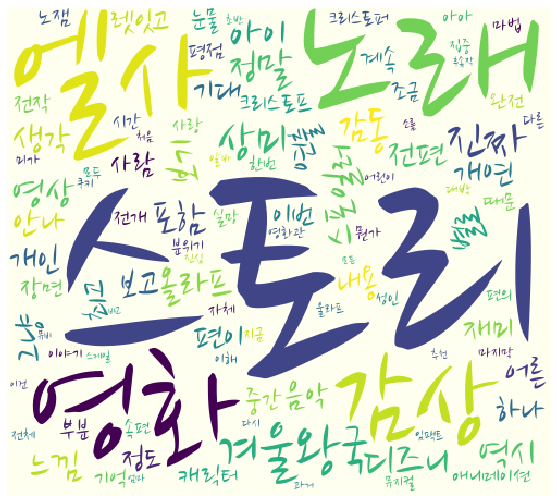

In [246]:
wordcloud1 = plt.figure(figsize=(12,9))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [250]:
wordcloud1.savefig('wordcloud_AI.png')

In [249]:
from PIL import Image

In [252]:
AI_mask = np.array(Image.open('./naver_img/%s.png'%srcText))

In [259]:
plt.figure(figsize=(98,141))

<Figure size 7056x10152 with 0 Axes>

<Figure size 7056x10152 with 0 Axes>

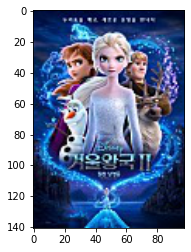

In [260]:
plt.imshow(AI_mask, interpolation="bilinear")

In [266]:
wc2=WordCloud(font_path='C:/Users/an/AppData/Local/Microsoft/Windows/Fonts/나눔손글씨붓.TTF', background_color='white', width=98, height=141, mask =AI_mask )

In [267]:
cloud2=wc2.generate_from_frequencies(dict(word_count))

In [268]:
from wordcloud import ImageColorGenerator

image_colors=ImageColorGenerator(AI_mask)

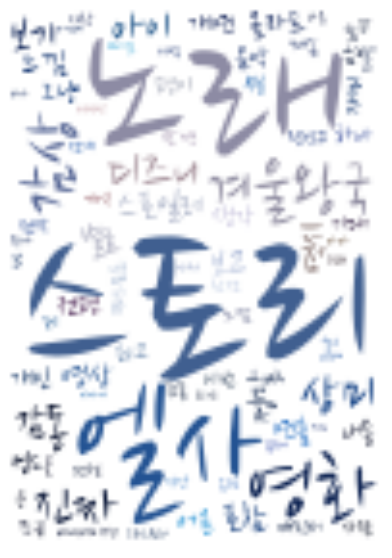

In [269]:
wordcloud2 = plt.figure(figsize=(12,10))
plt.imshow(cloud2.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()

In [270]:
wordcloud2.savefig('wordcloud_AI_2.png')